In [3]:
! pip install --upgrade pip
! pip install matplotlib
! pip install sklearn
! pip install seaborn

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable
  Using cached seaborn-0.11.2-py3-none-any.whl (292 kB)


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import TfidfVectorizer
import seaborn

from commons.documents_reader import get_documents

ابتدا لغات پرتکرار را بدست می‌آوریم و در ادامه باید آن‌ها را از متن اصلی حذف کنیم. بعد از اجرای نهایی کل برنامه، با توجه به لغات تعیین کننده در هر دسته، ممکن است این مجموعه را تغییر بدیم و بعضی لغات را اضافه و یا حذف کنیم، به طور مثال فرض کنید کلمه‌ی «که» یک کلمه‌ی تعیین‌کننده و مهم در یک دسته‌ای باشد، باید آن را حذف کنیم تا لغات معنی‌دار واقعی جایگزین آن بشود.

In [13]:
def get_stopwords():
    file_path = '/home/mohammad/Desktop/Advanced_Information_Retrieval/hw3/hw3_project/commons/stopwords.txt'
    with open(file_path, 'r') as file:
        return list(set([line.replace('\n', '') for line in file.readlines()]))

stopwords = get_stopwords()

حال عناوین تمام نمونه هارا بدست می‌آوریم، به همین منظور خط اول تمام صفحات را استخراج می‌کنیم:

In [14]:
titles = [document.content.split('\n')[0] for document in get_documents()]

حال می‌خواهیم ابتدا به کمک یک tokenizer خوب لغات را تشخیص بدهیم و همچنین لغات اضافه را از آن حذف کنیم، و از طرفی به کمک tfidf  به آنها وزن دهی هم بکنیم با توجه به میزان تکرار شدنشان:

In [20]:
from hazm import word_tokenize

tf_idf_vectorizor = TfidfVectorizer(norm='l2', tokenizer=word_tokenize, stop_words=stopwords)
tf_idf = tf_idf_vectorizor.fit_transform(titles)
tf_idf_array = tf_idf.toarray()
all_features = tf_idf_vectorizor.get_feature_names_out()
final_df_array = pd.DataFrame(data=tf_idf_array, columns=all_features).to_numpy()

حال نوبت به الگوریتم Kmean می‌رسد و به کمک آن تمام نمونه‌ها را خوشه‌بندی می‌کنیم. برای این قسمت بردار هایی که توسط tfidf بدست آوردیم را به عنوان ورودی تحویل می‌دهیم.

In [21]:
kmeans = KMeans(n_clusters=10, random_state=1, verbose=False)
kmeans.fit(tf_idf_array)

KMeans(n_clusters=10, random_state=1, verbose=False)

تابع زیر با گرفتن آرایه‌ی نتیجه‌ی KMean لغات پرتکرار هر کلاستر را چاپ می‌کند.

In [24]:
def print_top_features_of_clusters(prediction, n_features):
    plt.figure(figsize=(8, 4))
    labels = np.unique(prediction)
    for label in labels:
        cluster_features = np.where(prediction == label)
        x_means = np.mean(tf_idf_array[cluster_features], axis=0)  # returns average score across cluster
        sorted_means = np.argsort(x_means)[::-1][:n_features]  # indices with top 20 scores
        best_features = [(all_features[i], x_means[i]) for i in sorted_means]
        df = pd.DataFrame(best_features, columns=['features', 'score'])
        plt.title(("Most occurred words of cluster " + str(label)), fontsize=10, fontweight='bold')
        seaborn.barplot(x='score', y='features', orient='h', data=df[:n_features])
        print(df[:n_features])
        plt.show()

  features     score
0    كوتاه  0.633786
1    اخبار  0.176806
2   خبرهاي  0.096736
3    سياست  0.095126
4      هفت  0.076627
5     جهان  0.074679
6      هنر  0.074585
7     فيلم  0.045138
8  جشنواره  0.040103
9      فجر  0.033802


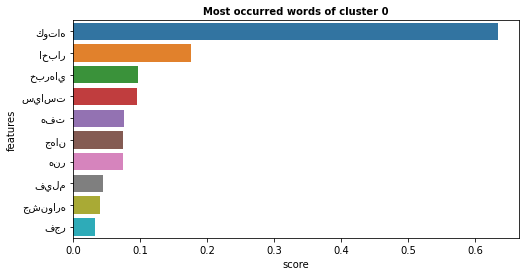

  features     score
0    ايران  0.260942
1   فوتبال  0.032061
2      ليگ  0.026830
3     برتر  0.026147
4    خودرو  0.023351
5   سينماي  0.017147
6      ملي  0.015265
7      تيم  0.015194
8    جهاني  0.010836
9  واليبال  0.010444


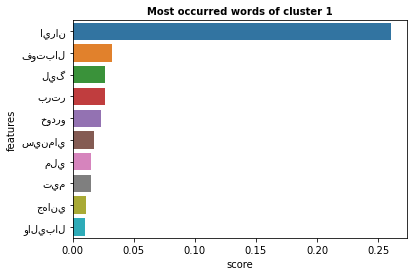

  features     score
0     روشن  0.580131
1     سايه  0.562276
2   اقتصاد  0.179953
3      هنر  0.046103
4     دانش  0.037902
5    زندگي  0.033450
6   ادبيات  0.024871
7   موسيقي  0.023978
8    سياست  0.023231
9    فرهنگ  0.023140


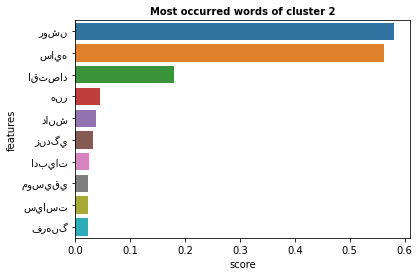

  features     score
0     كشور  0.142254
1   سازمان  0.117383
2   فرهنگي  0.106405
3    ميراث  0.079199
4  گردشگري  0.055430
5     علمي  0.021456
6      ملل  0.021452
7   بهداشت  0.012391
8     رئيس  0.012279
9    تشكيل  0.012139


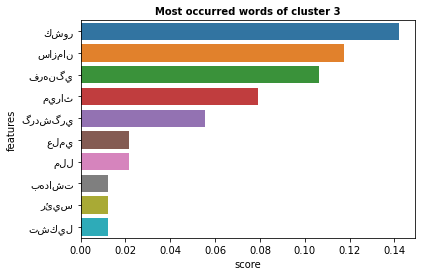

  features     score
0      شهر  0.459491
1    شوراي  0.126784
2    تهران  0.071740
3       بم  0.040097
4     رئيس  0.036292
5     نگار  0.034203
6      عضو  0.033054
7    تصويب  0.031042
8     مركز  0.017927
9  كميسيون  0.017099


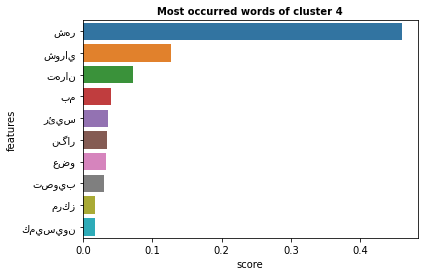

    features     score
0       رئيس  0.215203
1       مجلس  0.164233
2     جمهوري  0.054315
3      جمهور  0.042259
4       مركز  0.038421
5  نمايندگان  0.033363
6    كميسيون  0.033064
7     سازمان  0.029972
8      وزارت  0.020630
9      تصويب  0.019839


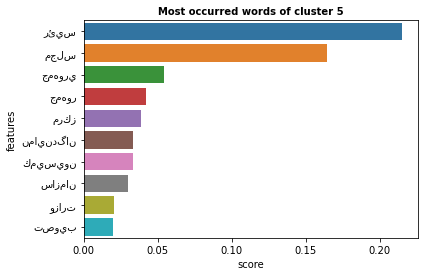

   features     score
0     تهران  0.270841
1   شهرداري  0.057901
2      بورس  0.026458
3  سينماهاي  0.023259
4      فروش  0.020845
5   فيلم ها  0.020411
6    شهردار  0.020259
7     معاون  0.018561
8    ترافيك  0.014449
9     منطقه  0.014371


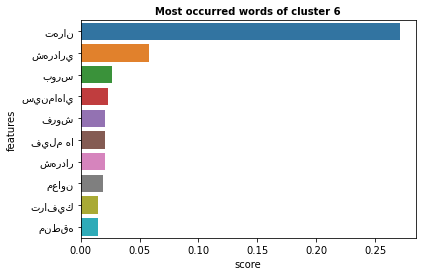

  features     score
0     وزير  0.008620
1     جهان  0.007733
2     فيلم  0.007487
3    بازار  0.007445
4  جشنواره  0.007391
5      سال  0.006900
6     سهام  0.005200
7     آغاز  0.004984
8   آمريكا  0.004911
9    حاشيه  0.004855


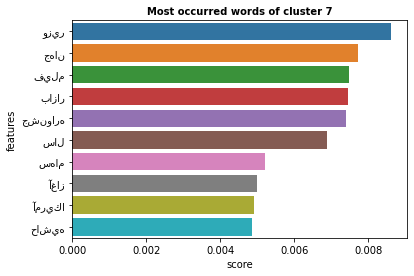

    features     score
0       نگاه  0.974356
1      منتقد  0.038390
2       پزشك  0.007863
3     ‎/سايه  0.000000
4  حقوقدانان  0.000000
5      حقوقي  0.000000
6       حكام  0.000000
7        حكم  0.000000
8       حكمت  0.000000
9    حكمتيار  0.000000


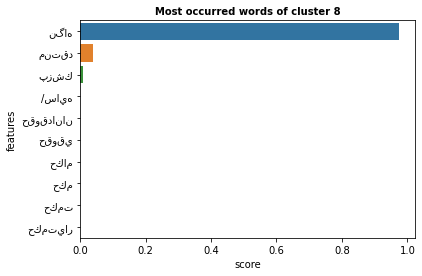

  features     score
0   افزايش  0.195323
1   ميليون  0.130106
2     يافت  0.045163
3     قيمت  0.033364
4      وام  0.026351
5     دلار  0.025984
6      نفر  0.022213
7      حجم  0.020481
8    تقاضا  0.020188
9      سال  0.019452


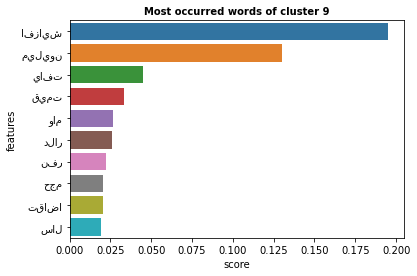

In [26]:
prediction = kmeans.predict(final_df_array)
print_top_features_of_clusters(prediction, 10)